In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [27]:
# read in data file
readcsv = pd.read_csv("Data.csv")
readcsv.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [28]:
sandbox = readcsv.copy()

In [29]:
# filter out rows with no listing price
sandbox.drop(sandbox[sandbox["Listing Price"] == 0].index, inplace = True)

In [30]:
# filter out rows with no reviews
sandbox.drop(sandbox[sandbox["Reviews"] == 0].index, inplace = True)
len(sandbox)

2752

In [31]:
# filter out rows with no ratings
sandbox.drop(sandbox[sandbox["Rating"] == 0].index, inplace = True)
len(sandbox)

2680

In [32]:
sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [33]:
#add columns for Adidas/Nike distinction and gender market
sandbox['True_Brand']= ""
sandbox['Gender'] = ""
sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,,


In [34]:
#finding array of unique brands (justifying our Nike or Adidas logic)
sandbox["Brand"].unique()

array(['Adidas Adidas ORIGINALS', 'Adidas ORIGINALS', 'Adidas CORE / NEO',
       'Adidas SPORT PERFORMANCE', 'Nike'], dtype=object)

In [35]:
#loop through rows to create binary Nike/ Adidas column
# for index, row in sandbox.iterrows():
#     try:
        
        
for index, row in sandbox.iterrows():
    Brand_Name = row["Brand"]
    
    if Brand_Name == 'Nike':
        sandbox.loc[[index], "True_Brand"]= "Nike"
    else:
        sandbox.loc[[index], "True_Brand"]= "Adidas"
sandbox

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,
...,...,...,...,...,...,...,...,...,...,...,...,...
3248,Nike Zoom Pegasus Turbo XX,AR4347-600,16995,13597,0,Nike,"Bridging performance and style, the Nike Zoom ...",1.0,1,2020-04-13T15:38:54,Nike,
3255,Nike Zoom Pegasus Turbo 2 Special Edition,BV7757-500,15995,12797,0,Nike,The Nike Zoom Pegasus Turbo 2 is updated with ...,5.0,1,2020-04-13T15:39:05,Nike,
3261,Kyrie 6 'Enlightenment',BQ4630-500,10995,8797,0,Nike,"In spiritual circles, the colour purple repres...",4.4,10,2020-04-13T15:40:56,Nike,
3263,Air Jordan 8 Retro,CI1236-100,15995,12797,0,Nike,The Air Jordan 8 Retro recaptures the memorabl...,5.0,1,2020-04-13T15:41:01,Nike,


In [36]:
#Do the same thing for gender
# sandbox.loc[[index], "True_Brand"]= "Nike"

for index, row in sandbox.iterrows():
    #sandbox['Product_Name'] = row["Product_Name"]
    if row["Product Name"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Product Name"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Product Name"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      

    elif row["Description"].lower().find("women")!= -1:
        sandbox.loc[index, "Gender"]= "Women"
    elif row["Description"].lower().find("men")!= -1:
        sandbox.loc[index, "Gender"]= "Men"
    elif row["Description"].lower().find("unisex")!= -1:
        sandbox.loc[index, "Gender"]= "Unisex"      
    else:
        sandbox.loc[index, "Gender"]= "Unknown"
sandbox["Gender"].unique()

array(['Women', 'Men', 'Unisex', 'Unknown'], dtype=object)

In [37]:
# Create Average shoe rating for each brand by gender; total, men, women, unisex, unknown
# ADIDAS: Total, Men, Women, Uni, Unknown------------------------------------------------
adi_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng = adi_rtng_df["Rating"].mean()
adi_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
adi_rtng_man_df = adi_rtng_man_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtng_man = adi_rtng_man_df["Rating"].mean()
adi_rtg_women_df = sandbox.loc[sandbox["Gender"] == "Women"]
adi_rtg_women_df = adi_rtg_women_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_women = adi_rtg_women_df["Rating"].mean()
adi_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
adi_rtg_uni_df = adi_rtg_uni_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_uni = adi_rtg_uni_df["Rating"].mean()
adi_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
adi_rtg_unkn_df = adi_rtg_unkn_df.loc[sandbox["True_Brand"] == "Adidas"]
adi_rtg_unkn = adi_rtg_unkn_df["Rating"].mean()
# NIKE: Total, men, women, Uni, Unknown---------------------------------------------------
nike_rtng_df = sandbox.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng = nike_rtng_df["Rating"].mean()
nike_rtng_man_df = sandbox.loc[sandbox["Gender"] == "Men"]
nike_rtng_man_df = nike_rtng_man_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_man = nike_rtng_man_df["Rating"].mean()
nike_rtng_woman_df = sandbox.loc[sandbox["Gender"] == "Women"]
nike_rtng_woman_df = nike_rtng_woman_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtng_woman = nike_rtng_woman_df["Rating"].mean()
nike_rtg_uni_df = sandbox.loc[sandbox["Gender"] == "Unisex"]
nike_rtg_uni_df = nike_rtg_uni_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtg_uni = nike_rtg_uni_df["Rating"].mean()
nike_rtg_unkn_df = sandbox.loc[sandbox["Gender"] == "Unknown"]
nike_rtg_unkn_df = nike_rtg_unkn_df.loc[sandbox["True_Brand"] == "Nike"]
nike_rtg_unkn = nike_rtg_unkn_df["Rating"].mean()

Text(0.5, 1.0, 'Adidas vs. Nike: avg product rating by gender')

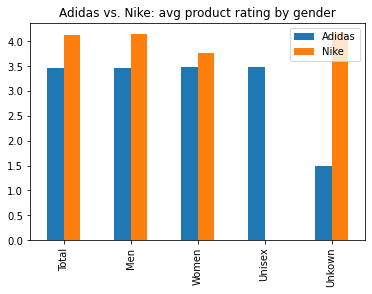

In [38]:
# Plot Nike vs. Adidas by gender
ratingsplotdata = pd.DataFrame(
    {"Adidas": [adi_rtng, adi_rtng_man, adi_rtg_women, adi_rtg_uni, adi_rtg_unkn],
    "Nike": [nike_rtng, nike_rtng_man, nike_rtng_woman, nike_rtg_uni, nike_rtg_unkn]}, 
    index=["Total", "Men", "Women", "Unisex", "Unkown"])
# Plot a bar chart
ratingsplotdata.plot(kind="bar")
plt.title("Adidas vs. Nike: avg product rating by gender")

In [48]:
# add columns for Listing Price $, Sale Price $, and Discount $ 
sandbox["Listing Price $"]= ""
sandbox["Sale Price $"]= ""
sandbox["Discount $"]= ""
sandbox.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender,List - Sale price,Listing Price $,Sale Price $,Discount $
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,Women,7500,,,
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,Women,3800,,,
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,Women,400,,,
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,Women,3500,,,
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,Women,4000,,,


In [49]:
# populate columns for Listing Price $, Sale Price $, and Discount $ 
for row in sandbox:
    sandbox["Listing Price $"] = sandbox["Listing Price"]/100
    sandbox["Sale Price $"] = sandbox["Sale Price"]/100
    sandbox["Discount $"] = sandbox["Listing Price $"] - sandbox["Sale Price $"]
sandbox.head()    

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited,True_Brand,Gender,List - Sale price,Listing Price $,Sale Price $,Discount $
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14,Adidas,Women,7500,149.99,74.99,75.0
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15,Adidas,Women,3800,75.99,37.99,38.0
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15,Adidas,Women,400,9.99,5.99,4.0
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15,Adidas,Women,3500,69.99,34.99,35.0
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15,Adidas,Women,4000,79.99,39.99,40.0


In [72]:
sandbox["Gender"].value_counts()

Men        1707
Women       763
Unknown     113
Unisex       97
Name: Gender, dtype: int64

In [106]:
# --------------------------------------------------------------------
# Discount Comparison
# --------------------------------------------------------------------
Nike_Total = sandbox.loc[sandbox["True_Brand"] == "Nike"]
Adidas_Total = sandbox.loc[sandbox["True_Brand"] == "Adidas"]
# --------------------------------------------------------------------
# Create DataFrames for different genders
# --------------------------------------------------------------------
Nike_Men = Nike_Total.loc[Nike_Total["Gender"] == "Men"]
Adidas_Men = Adidas_Total.loc[Adidas_Total["Gender"] == "Men"]
Nike_Women = Nike_Total.loc[Nike_Total["Gender"] == "Women"]
Adidas_Women = Adidas_Total.loc[Adidas_Total["Gender"] == "Women"]
Nike_Unknown = Nike_Total.loc[Nike_Total["Gender"] == "Unknown"]
Adidas_Unknown = Adidas_Total.loc[Adidas_Total["Gender"] == "Unknown"]
Nike_Unisex = Nike_Total.loc[Nike_Total["Gender"] == "Unisex"]
Adidas_Unisex = Adidas_Total.loc[Adidas_Total["Gender"] == "Unisex"]

In [107]:
# --------------------------------------------------------------------
# NIKE | Create Discount Statistics for Total, Men, Women, Unisex, Unknown
# --------------------------------------------------------------------
Nike_Total_List_Price = sum(Nike_Total["Listing Price $"])/len(Nike_Total)
Nike_Total_Sale_Price = sum(Nike_Total["Sale Price $"])/len(Nike_Total)
Nike_Total_Discount_Dollars = Nike_Total_List_Price - Nike_Total_Sale_Price
Nike_Total_Discount_Percent = Nike_Total_Discount_Dollars / Nike_Total_List_Price
# --------------------------------------------------------------------
Nike_Men_List_Price = sum(Nike_Men["Listing Price $"])/len(Nike_Men)
Nike_Men_Sale_Price = sum(Nike_Men["Sale Price $"])/len(Nike_Men)
Nike_Men_Discount_Dollars = Nike_Men_List_Price - Nike_Men_Sale_Price
Nike_Men_Discount_Percent = Nike_Men_Discount_Dollars / Nike_Men_List_Price
# --------------------------------------------------------------------
Nike_Women_List_Price = sum(Nike_Women["Listing Price $"])/len(Nike_Women)
Nike_Women_Sale_Price = sum(Nike_Women["Sale Price $"])/len(Nike_Women)
Nike_Women_Discount_Dollars = Nike_Women_List_Price - Nike_Women_Sale_Price
Nike_Women_Discount_Percent = Nike_Women_Discount_Dollars / Nike_Women_List_Price
# --------------------------------------------------------------------
# Ignore Nike Unisex, there are none
# --------------------------------------------------------------------
# Nike_Unisex_List_Price = sum(Nike_Unisex["Listing Price $"])/len(Nike_Unisex)
# Nike_Unisex_Sale_Price = sum(Nike_Unisex["Sale Price $"])/len(Nike_Unisex)
# Nike_Unisex_Discount_Dollars = Nike_Unisex_List_Price - Nike_Unisex_Sale_Price
# Nike_Unisex_Discount_Percent = Nike_Unisex_Discount_Dollars / Nike_Unisex_List_Price
# --------------------------------------------------------------------
Nike_Unknown_List_Price = sum(Nike_Unknown["Listing Price $"])/len(Nike_Unknown)
Nike_Unknown_Sale_Price = sum(Nike_Unknown["Sale Price $"])/len(Nike_Unknown)
Nike_Unknown_Discount_Dollars = Nike_Unknown_List_Price - Nike_Unknown_Sale_Price
Nike_Unknown_Discount_Percent = Nike_Unknown_Discount_Dollars / Nike_Unknown_List_Price

In [109]:
# --------------------------------------------------------------------
# ADIDAS | Create Discount Statistics for Total, Men, Women, Unisex, Unknown
# --------------------------------------------------------------------
Adidas_Total_List_Price = sum(Adidas_Total["Listing Price $"])/len(Adidas_Total)
Adidas_Total_Sale_Price = sum(Adidas_Total["Sale Price $"])/len(Adidas_Total)
Adidas_Total_Discount_Dollars = Adidas_Total_List_Price - Adidas_Total_Sale_Price
Adidas_Total_Discount_Percent = Adidas_Total_Discount_Dollars / Adidas_Total_List_Price
# --------------------------------------------------------------------
Adidas_Men_List_Price = sum(Adidas_Men["Listing Price $"])/len(Adidas_Men)
Adidas_Men_Sale_Price = sum(Adidas_Men["Sale Price $"])/len(Adidas_Men)
Adidas_Men_Discount_Dollars = Adidas_Men_List_Price - Adidas_Men_Sale_Price
Adidas_Men_Discount_Percent = Adidas_Men_Discount_Dollars / Adidas_Men_List_Price
# --------------------------------------------------------------------
Adidas_Women_List_Price = sum(Adidas_Women["Listing Price $"])/len(Adidas_Women)
Adidas_Women_Sale_Price = sum(Adidas_Women["Sale Price $"])/len(Adidas_Women)
Adidas_Women_Discount_Dollars = Adidas_Women_List_Price - Adidas_Women_Sale_Price
Adidas_Women_Discount_Percent = Adidas_Women_Discount_Dollars / Adidas_Women_List_Price
# --------------------------------------------------------------------
Adidas_Unisex_List_Price = sum(Adidas_Unisex["Listing Price $"])/len(Adidas_Unisex)
Adidas_Unisex_Sale_Price = sum(Adidas_Unisex["Sale Price $"])/len(Adidas_Unisex)
Adidas_Unisex_Discount_Dollars = Adidas_Unisex_List_Price - Adidas_Unisex_Sale_Price
Adidas_Unisex_Discount_Percent = Adidas_Unisex_Discount_Dollars / Adidas_Unisex_List_Price
# --------------------------------------------------------------------
Adidas_Unknown_List_Price = sum(Adidas_Unknown["Listing Price $"])/len(Adidas_Unknown)
Adidas_Unknown_Sale_Price = sum(Adidas_Unknown["Sale Price $"])/len(Adidas_Unknown)
Adidas_Unknown_Discount_Dollars = Adidas_Unknown_List_Price - Adidas_Unknown_Sale_Price
Adidas_Unknown_Discount_Percent = Adidas_Unknown_Discount_Dollars / Adidas_Unknown_List_Price

In [117]:
# --------------------------------------------------------------------
# NIKE | Print Discount Statistics for Total, Men, Women, Unisex, Unknown
# --------------------------------------------------------------------
print("--------------------------------------------------------------------")
print("NIKE STATS")
print("--------------------------------------------------------------------")
print(f"Nike Total List Price ${Nike_Total_List_Price:.2f}")
print(f"Nike Total Sale Price ${Nike_Total_Sale_Price:.2f}")
print(f"Nike Total Discount Dollars ${Nike_Total_Discount_Dollars:.2f}")
print(f"Nike Total Discount Percent {Nike_Total_Discount_Percent*100:.2f}%")
print(f"Nike Total Count {len(Nike_Total)}")
print("--------------------------------------------------------------------")
print(f"Nike Men List Price ${Nike_Men_List_Price:.2f}")
print(f"Nike Men Sale Price ${Nike_Men_Sale_Price:.2f}")
print(f"Nike Men Discount Dollars ${Nike_Men_Discount_Dollars:.2f}")
print(f"Nike Men Discount Percent {Nike_Men_Discount_Percent*100:.2f}%")
print(f"Nike Men Count {len(Nike_Men)}")
print("--------------------------------------------------------------------")
print(f"Nike Women List Price ${Nike_Women_List_Price:.2f}")
print(f"Nike Women Sale Price ${Nike_Women_Sale_Price:.2f}")
print(f"Nike Women Discount Dollars ${Nike_Women_Discount_Dollars:.2f}")
print(f"Nike Women Discount Percent {Nike_Women_Discount_Percent*100:.2f}%")
print(f"Nike Women Count {len(Nike_Women)}")
# --------------------------------------------------------------------
# Ignore Nike Unisex, there are none
# --------------------------------------------------------------------
# print(f"Nike Unisex List Price ${Nike_Unisex_List_Price:.2f}")
# print(f"Nike Unisex Sale Price ${Nike_Unisex_Sale_Price:.2f}")
# print(f"Nike Unisex Discount Dollars ${Nike_Unisex_Discount_Dollars:.2f}")
# print(f"Nike Unisex Discount Percent {Nike_Unisex_Discount_Percent*100:.2f}%")
# print(f"Nike Unisex Count {len(Nike_Unisex)}")
print("--------------------------------------------------------------------")
print(f"Nike Unknown List Price ${Nike_Unknown_List_Price:.2f}")
print(f"Nike Unknown Sale Price ${Nike_Unknown_Sale_Price:.2f}")
print(f"Nike Unknown Discount Dollars ${Nike_Unknown_Discount_Dollars:.2f}")
print(f"Nike Unknown Discount Percent {Nike_Unknown_Discount_Percent*100:.2f}%")
print(f"Nike Unknown Count {len(Nike_Unknown)}")
# --------------------------------------------------------------------
# ADIDAS | Print Discount Statistics for Total, Men, Women, Unisex, Unknown
# --------------------------------------------------------------------
print("--------------------------------------------------------------------")
print("ADIDAS STATS")
print("--------------------------------------------------------------------")
print(f"Adidas Total List Price ${Adidas_Total_List_Price:.2f}")
print(f"Adidas Total Sale Price ${Adidas_Total_Sale_Price:.2f}")
print(f"Adidas Total Discount Dollars ${Adidas_Total_Discount_Dollars:.2f}")
print(f"Adidas Total Discount Percent {Adidas_Total_Discount_Percent*100:.2f}%")
print(f"Adidas Total Count {len(Adidas_Total)}")
print("--------------------------------------------------------------------")
print(f"Adidas Men List Price ${Adidas_Men_List_Price:.2f}")
print(f"Adidas Men Sale Price ${Adidas_Men_Sale_Price:.2f}")
print(f"Adidas Men Discount Dollars ${Adidas_Men_Discount_Dollars:.2f}")
print(f"Adidas Men Discount Percent {Adidas_Men_Discount_Percent*100:.2f}%")
print(f"Adidas Men Count {len(Adidas_Men)}")
print("--------------------------------------------------------------------")
print(f"Adidas Women List Price ${Adidas_Women_List_Price:.2f}")
print(f"Adidas Women Sale Price ${Adidas_Women_Sale_Price:.2f}")
print(f"Adidas Women Discount Dollars ${Adidas_Women_Discount_Dollars:.2f}")
print(f"Adidas Women Discount Percent {Adidas_Women_Discount_Percent*100:.2f}%")
print(f"Adidas Women Count {len(Adidas_Women)}")
print("--------------------------------------------------------------------")
print(f"Adidas Unisex List Price ${Adidas_Unisex_List_Price:.2f}")
print(f"Adidas Unisex Sale Price ${Adidas_Unisex_Sale_Price:.2f}")
print(f"Adidas Unisex Discount Dollars ${Adidas_Unisex_Discount_Dollars:.2f}")
print(f"Adidas Unisex Discount Percent {Adidas_Unisex_Discount_Percent*100:.2f}%")
print(f"Adidas Unisex Count {len(Adidas_Unisex)}")
print("--------------------------------------------------------------------")
print(f"Adidas Unknown List Price ${Adidas_Unknown_List_Price:.2f}")
print(f"Adidas Unknown Sale Price ${Adidas_Unknown_Sale_Price:.2f}")
print(f"Adidas Unknown Discount Dollars ${Adidas_Unknown_Discount_Dollars:.2f}")
print(f"Adidas Unknown Discount Percent {Adidas_Unknown_Discount_Percent*100:.2f}%")
print(f"Adidas Unknown Count {len(Adidas_Unknown)}")

--------------------------------------------------------------------
NIKE STATS
--------------------------------------------------------------------
Nike Total List Price $117.45
Nike Total Sale Price $84.79
Nike Total Discount Dollars $32.66
Nike Total Discount Percent 27.81%
Nike Total Count 155
--------------------------------------------------------------------
Nike Men List Price $117.14
Nike Men Sale Price $84.03
Nike Men Discount Dollars $33.11
Nike Men Discount Percent 28.26%
Nike Men Count 31
--------------------------------------------------------------------
Nike Women List Price $89.03
Nike Women Sale Price $68.24
Nike Women Discount Dollars $20.80
Nike Women Discount Percent 23.36%
Nike Women Count 12
--------------------------------------------------------------------
Nike Unknown List Price $120.58
Nike Unknown Sale Price $86.77
Nike Unknown Discount Dollars $33.81
Nike Unknown Discount Percent 28.04%
Nike Unknown Count 112
-----------------------------------------------

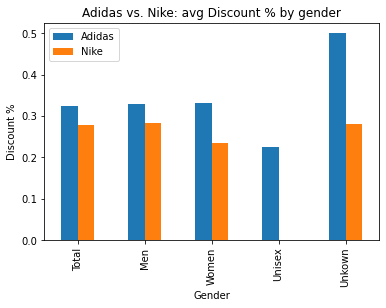

In [121]:
# Plot Nike vs. Adidas Discounting by Gender
Nike_Unisex_Discount_Percent = 0
discountingdata = pd.DataFrame(
    {"Adidas": [Adidas_Total_Discount_Percent, Adidas_Men_Discount_Percent, Adidas_Women_Discount_Percent, Adidas_Unisex_Discount_Percent, Adidas_Unknown_Discount_Percent],
    "Nike": [Nike_Total_Discount_Percent, Nike_Men_Discount_Percent, Nike_Women_Discount_Percent, Nike_Unisex_Discount_Percent, Nike_Unknown_Discount_Percent]}, 
    index=["Total", "Men", "Women", "Unisex", "Unkown"])
# Plot a bar chart
discountingdata.plot(kind="bar")
plt.xlabel("Gender")
plt.ylabel("Discount %")
plt.title("Adidas vs. Nike: avg Discount % by gender");